<a href="https://colab.research.google.com/github/RaymondLeong94/FI-DSC-PHASE-1-PROJECT/blob/main/Supplemental_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#(Supplemental) Remodeling of Project 1: Exploring im.db

The purpose of this notebook is to expand the project's purpose by including information from the sqlite3 file that was not used previously in this project


In [55]:
#import pandas and json along with drive 
import pandas as pd
import json
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
#change directory
%cd gdrive/MyDrive

/content/gdrive/MyDrive


In [3]:
#import necessary drives
import sqlite3 
%load_ext sql

In [4]:
#cform the connection
conn = sqlite3.connect("/content/gdrive/MyDrive/im.db")

In [5]:
#common place to keep track of changes to the database.
print("Data type:", type(conn))
print("Uncommitted changes:", conn.in_transaction)
print("Total changes:", conn.total_changes)

Data type: <class 'sqlite3.Connection'>
Uncommitted changes: False
Total changes: 0


In [6]:
#establish the cursor for the rows  of the result set. First we want to see what all has to show, we thus use * 
cur = conn.cursor()

In [7]:
#execute the command and fetchall to get the table names. 
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
table_names = list(cur.fetchall())
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [8]:
# an extremely rudimentary analysis was to look at the files individualy 
#an example is below
#take everything from movie basics
cur.execute("""SELECT * FROM movie_basics;""")
cur.fetchall()


#establishing what is to be retrieved 
Whatisinhere1 = """
SELECT *
FROM movie_basics
;
"""

#dataframe creation
df1 = pd.DataFrame(cur.execute(Whatisinhere1).fetchall())
display(df1.head(5))

,0,1,2,3,4,5
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


(('movie_id', None, None, None, None, None, None),
 ('primary_title', None, None, None, None, None, None),
 ('original_title', None, None, None, None, None, None),
 ('start_year', None, None, None, None, None, None),
 ('runtime_minutes', None, None, None, None, None, None),
 ('genres', None, None, None, None, None, None))

Previously we had the idea to iterate over each table present in the .db file and set it as a pandas dataframe to export to the public version of tableau, this is a ineffciient but free method compared to making your own SQL database and uploading your info there.

In [ ]:
#we want to say that for every string we would want to iterate over as part of the select statement.
#make this into a list of table names
cur = conn.cursor()
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [9]:
# an extremely rudimentary analysis was to look at the files individualy 
#an example is below
#take everything from movie basics
cur.execute("""SELECT * FROM movie_ratings;""")
cur.fetchall()


#establishing what is to be retrieved 
Whatisinhere2 = """
SELECT *
FROM movie_ratings
;
"""

#dataframe creation
df2 = pd.DataFrame(cur.execute(Whatisinhere2).fetchall())
display(df2.head(5))

,0,1,2
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [10]:
df2.columns = ['movie_id','averagerating', 'numvotes']

In [11]:
df1.columns= ['movie_id', 'primrary_title', 'original_title', 'start_time', 'minutes', 'genres']

In [12]:
df1_copy = df1.copy()
df2_copy = df2.copy()

In [13]:
import pandas as pd

In [14]:
basics_rating = pd.merge(df1_copy, df2_copy, how = 'left', on = 'movie_id')
display(basics_rating.head(5))

,movie_id,primrary_title,original_title,start_time,minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


<Axes: ylabel='Density'>

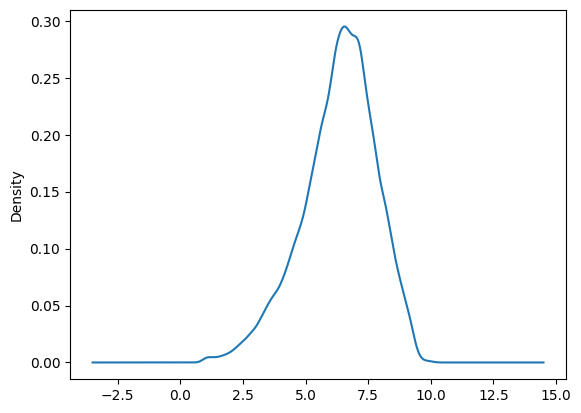

In [17]:
import matplotlib.pyplot as plt

basics_rating.averagerating.plot(kind = 'kde')


In [24]:
basics_rating.numvotes.sort_values(ascending = True)

88228     5.0
113497    5.0
59447     5.0
23547     5.0
113510    5.0
         ... 
146139    NaN
146140    NaN
146141    NaN
146142    NaN
146143    NaN
Name: numvotes, Length: 146144, dtype: float64

In [27]:
df1.shape

(146144, 6)

In [26]:
df2.shape

(73856, 3)

In [38]:
basics_rating.numvotes.isna().sum()

72288

At this point we need to figure out how much of the data is to be used. We will first slice the dataframe up until all the nan values 

In [39]:
146144-72288

73856

In [41]:
basics_rating.averagerating.isna().sum()


72288

In [42]:
basics_rating.movie_id.isna().sum()

0

In [45]:
from numpy import NaN
basic_rating_clean = basics_rating[basics_rating(averagerating != NaN )]

NameError: ignored

In [48]:
basics_rating_clean = basics_rating.dropna(subset = 'averagerating')


In [50]:
basics_rating_clean.averagerating * basics_rating_clean.numvotes

,movie_id,primrary_title,original_title,start_time,minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146115,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6.0
146122,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136.0
146125,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8.0
146129,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5.0


In [53]:
basics_rating_clean['total_votes'] = basics_rating_clean.apply(lambda row: (row['averagerating']*row['numvotes']),
                                            #   if row['Action']=='Sell'
                                          ##     else -row['Prices']*row['Amount']),
                                   axis=1)

<ipython-input-53-1ed71f032fca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basics_rating_clean['total_votes'] = basics_rating_clean.apply(lambda row: (row['averagerating']*row['numvotes']),


In [54]:
basics_rating_clean


,movie_id,primrary_title,original_title,start_time,minutes,genres,averagerating,numvotes,total_votes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,539.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,309.6
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,31167.3
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0,79.3
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,773.5
...,...,...,...,...,...,...,...,...,...
146115,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6.0,37.2
146122,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136.0,1183.2
146125,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8.0,68.0
146129,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5.0,33.0
